# Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. 
a. Perform Data Pre-processing 

b. Define Model and perform training 

c. Evaluate Results using confusion matrix.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

C:\Users\DELL\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\DELL\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\DELL\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\DELL\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\DELL\an

In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Reshape the data to fit the model input
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=200, validation_split=0.2)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.7441 - loss: 0.8159 - val_accuracy: 0.9722 - val_loss: 0.0922
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.9595 - loss: 0.1339 - val_accuracy: 0.9807 - val_loss: 0.0655
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.9727 - loss: 0.0910 - val_accuracy: 0.9841 - val_loss: 0.0574
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.9773 - loss: 0.0747 - val_accuracy: 0.9853 - val_loss: 0.0480
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.9807 - loss: 0.0622 - val_accuracy: 0.9864 - val_loss: 0.0483
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.9835 - loss: 0.0543 - val_accuracy: 0.9882 - val_loss: 0.0410
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.9836 - loss: 0.0514 - val_accuracy: 0.9869 - val_loss: 0.0408
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.9846 - loss: 0.0472 - 

In [7]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024874813854694366
Test accuracy: 0.9904000163078308


In [8]:
# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


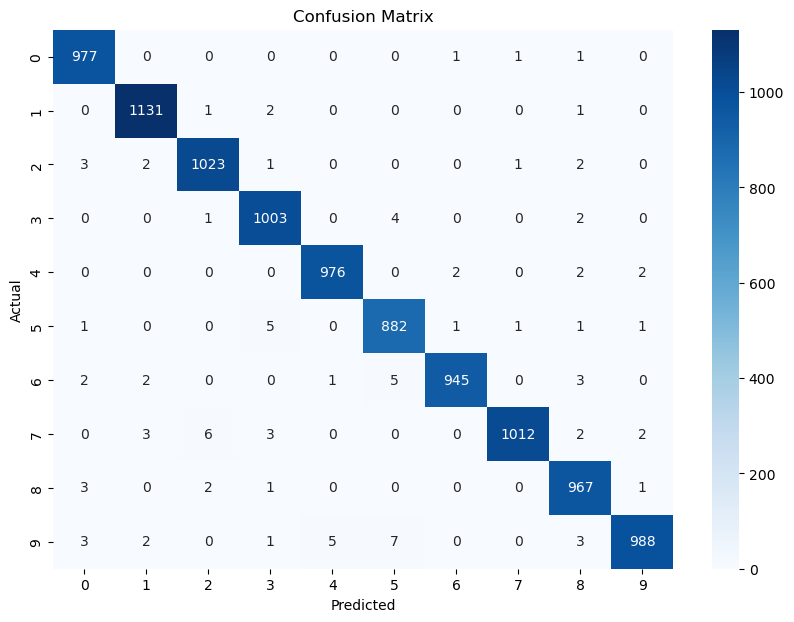

In [9]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Classification report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

